<a id="title_ID"></a>
# JWST Pipeline Validation Testing Notebook: Calwebb_detector1, reset step for MIRI

<span style="color:red"> **Instruments Affected**</span>: MIRI

### Table of Contents
<div style="text-align: left"> 

<br> [Imports](#imports_ID) <br> [Introduction](#intro_ID) <br> [Get Documentaion String for Markdown Blocks](#markdown_from_docs) <br> [Loading Data](#data_ID) <br> [Run JWST Pipeline](#pipeline_ID) <br> [Create Figure or Print Output](#residual_ID) <br> [About This Notebook](#about_ID) <br>

</div>

<a id="imports_ID"></a>
# Imports
List the library imports and why they are relevant to this notebook.

* get_bigdata to retrieve data from artifactory
* jwst.datamodels for building model for JWST Pipeline
* jwst.module.PipelineStep is the pipeline step being tested
* matplotlib.pyplot.plt to generate plot
* numpy
* inspect to get the docstring of our objects.
* IPython.display for printing markdown output


[Top of Page](#title_ID)

In [1]:
from ci_watson.artifactory_helpers import get_bigdata
import inspect
from IPython.display import Markdown
from jwst.dq_init import DQInitStep
from jwst.reset import ResetStep
from jwst.datamodels import RampModel
import matplotlib.pyplot as plt
import numpy as np

<a id="intro_ID"></a>
# Introduction


For this test we are using the reset step in the calwebb_detector1 pipeline. For MIRI exposures, the initial groups in each integration suffer from two effects related to the resetting of the detectors. The first effect is that the first few groups after a reset do not fall on the expected linear accumulation of signal. The most significant deviations ocurr in groups 1 and 2. This behavior is relatively uniform detector-wide. The second effect, on the other hand, is the appearance of significant extra spatial structure in these initial groups, before fading out in later groups. For more information on the pipeline step visit the links below. 

Step description: https://jwst-pipeline.readthedocs.io/en/latest/jwst/reset/description.html

Pipeline code: https://github.com/spacetelescope/jwst/tree/master/jwst/reset


### Calibration WG Requested Algorithm: 

A short description and link to the page: https://outerspace.stsci.edu/pages/viewpage.action?spaceKey=JWSTCC&title=Vanilla+MIR+Reset+Anomaly+Correction


### Defining Term
Here is where you will define terms or acronymns that may not be known a general audience (ie a new employee to the institute or an external user). For example

JWST: James Webb Space Telescope

MIRI: Mid Infrared Instrument


[Top of Page](#title_ID)

<a id="markdown_from_docs"></a>
# Get Documentaion String for Markdown Blocks

In [2]:
# Get raw python docstring
raw = inspect.getdoc(ResetStep)

# To convert to markdown, you need convert line breaks from \n to <br />
markdown_text = "<br />".join(raw.split("\n"))

# Here you can format markdown as an output using the Markdown method.
Markdown("""
# ResetStep
---
{}
""".format(markdown_text))


# ResetStep
---
ResetStep: Performs a reset  correction by subtracting<br />the reset correction reference data from the input science data model.


<a id="data_ID"></a>
# Loading Data

The data used to test this step is a dark data file taken as part of pre-launch ground testing. The original file name is MIRV00330001001P0000000002101_1_493_SE_2017-09-07T15h14m25.fits that was renamed to jw02201001001_01101_00001_MIRIMAGE_uncal.fits with a script that updates the file to put it in pipeline ready formatting.
This is a dark data file with 40 frames and 4 integrations.

[Top of Page](#title_ID)

In [3]:
filename = get_bigdata('jwst_validation_notebooks',
                     'validation_data',
                     'reset',
                     'reset_miri_test', 
                     'jw02201001001_01101_00001_MIRIMAGE_uncal.fits')

<a id="pipeline_ID"></a>
# Run JWST Pipeline

Take the initial input file and run it through both dq_init and reset to get the before and after correction versions of the data to run.

[Top of Page](#title_ID)

In [4]:
preim = DQInitStep.call(filename)
postim = ResetStep.call(preim)

2020-08-06 15:04:37,327 - CRDS - ERROR -  Error determining best reference for 'pars-dqinitstep'  =   Unknown reference type 'pars-dqinitstep'


2020-08-06 15:04:37,331 - stpipe.DQInitStep - INFO - DQInitStep instance created.


2020-08-06 15:04:37,606 - stpipe.DQInitStep - INFO - Step DQInitStep running with args ('/data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/jwst_validation_notebooks/reset/jwst_reset_miri_test/jw02201001001_01101_00001_MIRIMAGE_uncal.fits',).


2020-08-06 15:04:37,609 - stpipe.DQInitStep - INFO - Step DQInitStep parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2020-08-06 15:04:39,016 - stpipe.DQInitStep - INFO - Using MASK reference file /tmp/crds_cache/references/jwst/miri/jwst_miri_mask_0023.fits


2020-08-06 15:04:40,700 - stpipe.DQInitStep - INFO - Step DQInitStep done


2020-08-06 15:04:40,984 - CRDS - ERROR -  Error determining best reference for 'pars-resetstep'  =   Unknown reference type 'pars-resetstep'


2020-08-06 15:04:40,987 - stpipe.ResetStep - INFO - ResetStep instance created.


2020-08-06 15:04:41,087 - stpipe.ResetStep - INFO - Step ResetStep running with args (<RampModel(4, 40, 1024, 1032) from jw02201001001_01101_00001_MIRIMAGE_uncal.fits>,).


2020-08-06 15:04:41,090 - stpipe.ResetStep - INFO - Step ResetStep parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2020-08-06 15:04:41,105 - stpipe.ResetStep - INFO - Using RESET reference file /tmp/crds_cache/references/jwst/miri/jwst_miri_reset_0042.fits


2020-08-06 15:04:41,291 - stpipe.ResetStep - WARNING - Keyword RESET_LARGE does not correspond to an existing DQ mnemonic, so will be ignored


2020-08-06 15:04:43,147 - stpipe.ResetStep - INFO - Step ResetStep done


<a id="residual_ID"></a>
# Show plots and take statistics before and after correction

For a specific pixel in the dark data:
1. Plot the ramps before and after the correction to see if the initial frame values are more in line with the rest of the ramp.
2. Fit a line to the ramps and calculate the slope and residuals. The slope should be closer to 0 and the residuals should be much smaller after the correction.
3. Plot the residuals of a single integration before and after the correction to see if they are smaller.

[Top of Page](#title_ID)

In [5]:
# set input variables
print('Shape of data cube: integrations, groups, ysize, xsize ',preim.shape)

xval = 650
yval = 550

framenum = 20  # number of frames to plot (reset only corrects first few frames in cube)
intsnum = 3  # number of integrations to plot (3 should show reset and not crowd)
    
# put data into proper data models
# read in images
with RampModel(preim) as impre:
    # raises exception if file is not the correct model
    pass

# read in image
with RampModel(postim) as impost:
    # raises exception if file is not the correct model
    pass
    

Shape of data cube: integrations, groups, ysize, xsize  (4, 40, 1024, 1032)


First plot should show that after the correction, the drop at the early part of the ramp has evened out to resemble the data in the rest of the ramp.

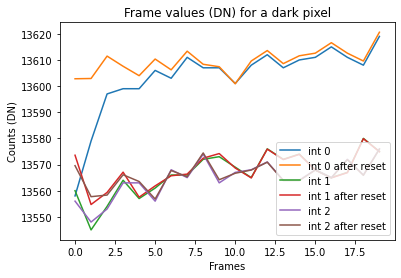

In [6]:
# Plot frames vs. counts for a dark pixel before and after correction

# loop through integrations
for i in range(0, intsnum):

    # get locations of flagged pixels within the ramps
    ramp1 = impre.data[i, 0:framenum, yval, xval]
    ramp2 = impost.data[i, 0:framenum, yval, xval]

    # plot ramps of selected pixels
    plt.title('Frame values (DN) for a dark pixel')
    plt.xlabel('Frames')
    plt.ylabel('Counts (DN)')
    plt.plot(ramp1+i*10, label='int ' + str(i))
    plt.plot(ramp2+i*10, label='int ' + str(i) + ' after reset')

plt.legend(loc=4)
plt.show()


Take a single pixel in the file, before and after the correction, and fit a line to them. After the correction, for a dark, the slope should be closer to zero and the residuals should be much lower.

In [7]:
# get array of frame numbers and choose ramps for selected pixel
frames = np.arange(0, framenum)
 
preramp = impre.data[0, 0:framenum, yval, xval]
postramp = impost.data[0, 0:framenum, yval, xval]

# get slopes of selected pixel before and after correction and see if it is more linear
fit = np.polyfit(frames, preramp, 1, full=True)

slopepre = fit[0][0]
interceptpre = fit[0][1]
residualspre = fit[1][0]

fitpost = np.polyfit(frames, postramp, 1, full=True)

slopepost = fitpost[0][0]
interceptpost = fitpost[0][1]
residualspost = fitpost[1][0]

# look at slopes and variances
print('The slope of the pixel before correction is: ', slopepre)
print('The slope of the pixel after correction is: ', slopepost)

print('The residuals of the pixel before correction are: ', residualspre)
print('The residuals of the pixel after correction are: ', residualspost)


The slope of the pixel before correction is:  1.7052631578944015
The slope of the pixel after correction is:  0.5314027255638181
The residuals of the pixel before correction are:  1565.031578946565
The residuals of the pixel after correction are:  259.19273828059295


Plot the residuals for the linear fit before and after correction for the specified pixel to see if the plotted ramp is flatter after the correction.

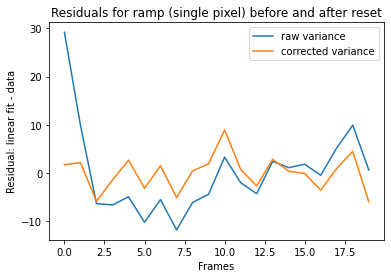

In [8]:
# show line plus residual for 1st int
yfit = np.polyval(fit[0], frames)
yfitcorr = np.polyval(fitpost[0], frames)

plt.title('Residuals for ramp (single pixel) before and after reset')
plt.xlabel('Frames')
plt.ylabel('Residual: linear fit - data')
plt.plot(frames, yfit - preramp, label='raw variance')
plt.plot(frames, yfitcorr - postramp, label='corrected variance')
plt.legend()
plt.show()


<a id="about_ID"></a>
## About this Notebook
**Author:** Misty Cracraft, Senior Staff Scientist, MIRI Branch
<br>**Updated On:** 05/12/2020

[Top of Page](#title_ID)
<img style="float: right;" src="./stsci_pri_combo_mark_horizonal_white_bkgd.png" alt="stsci_pri_combo_mark_horizonal_white_bkgd" width="200px"/> 